# КуйбышевАзот

**Химическая промышленность / [КуйбышевАзот](https://www.kuazot.ru/invest/ifrs_reporting/) (KAZT)**

> Одна из ведущих химических компаний в России, лидер в РФ и Восточной Европе по выпуску капролактама и полиамида, крупнейший производитель технических и текстильных нитей, кордной ткани, полиамидных и смесовых тканей в России. (*оф. сайт КуйбышевАзот*)

## Менеджмент

Переходим в [раздел](https://www.kuazot.ru/company/control/) менеджмента компании и замечаем, что председатель совета директоров и два из семи менеджеров - возможно родственники.
Прямо это не говорит ни о чём, но сам факт можно учесть.

In [3]:
company = 'KAZT'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
dt = pd.read_csv('../tables/data_KAZT.csv', index_col=0)
dt = dt.sort_index()

In [68]:
dt

,revenue,cost_price,capital,assets,net_profit,n_shares,dividend_per_share,share_price,dividend
2015,4.250000e+10,2.740000e+10,1.940000e+10,4.796000e+10,4.140000e+09,234100000.0,4.5,80.0,1.083300e+09
2016,4.250000e+10,3.170000e+10,2.340000e+10,5.350000e+10,5.240000e+09,234100000.0,3.0,89.3,7.164000e+08
2017,4.780000e+10,3.700000e+10,2.540000e+10,5.820000e+10,2.580000e+09,234100000.0,4.0,89.7,9.514000e+08
2018,6.380000e+10,4.510000e+10,3.080000e+10,6.250000e+10,7.750000e+09,234100000.0,7.0,113.6,1.664900e+09
2019,5.740000e+10,4.420000e+10,3.170000e+10,6.550000e+10,2.270000e+09,234100000.0,2.0,147.2,4.757000e+08


In [69]:
dt['obligations'] = dt['assets'] - dt['capital']
dt['capitalization'] = dt['n_shares']*dt['share_price']

## Динамика выручки, капитала, обязательств, активов

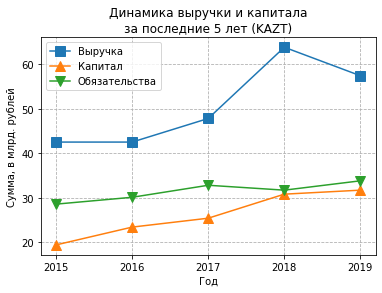

In [85]:
plt.plot(dt.index, dt['revenue']*1e-9, marker='s', ms=10, label='Выручка')
plt.plot(dt.index, dt['capital']*1e-9, marker='^', ms=10, label='Капитал')
plt.plot(dt.index, dt['obligations']*1e-9, marker='v', ms=10, label='Обязательства')
plt.xticks([2015, 2016, 2017, 2018, 2019], [2015, 2016, 2017, 2018, 2019])
plt.legend()
plt.title(f'Динамика выручки и капитала\nза последние 5 лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд. рублей')
plt.grid(ls='--')
# plt.savefig('../images/revenue.png', dpi=200)

Выручка за 5 лет выросла, особенно порадовал 2018 год.
Виден тренд на рост выручки за последние пять лет.
Капитал увеличивается, значит компания растёт.

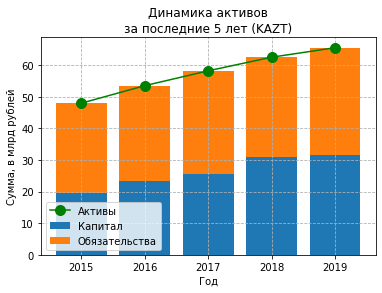

In [86]:
plt.plot(dt.index, dt['assets']*1e-9, marker='o', ms=10, label='Активы', c='g')
plt.bar(dt.index, dt['capital']*1e-9, label='Капитал')
plt.bar(dt.index, dt['obligations']*1e-9, bottom=dt['capital']*1e-9, label='Обязательства')
plt.xticks([2015, 2016, 2017, 2018, 2019], [2015, 2016, 2017, 2018, 2019])
plt.legend()
plt.title(f'Динамика активов\nза последние 5 лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--')
# plt.savefig('../assets.png', dpi=200)

Динамика активов за последние пять лет показывает постоянный рост бизнеса.

Теперь смотрим на зависимость чистой прибыли

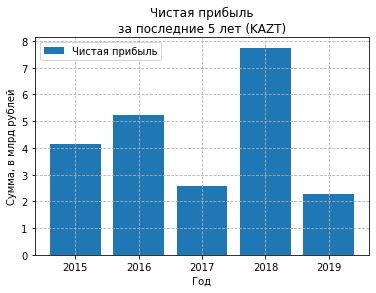

In [87]:
name = "Чистая прибыль"
# plt.plot(dt.index, dt['net_profit']*1e-9, marker='o', ms=10, label='Чистая прибыль')
plt.bar(dt.index, dt['net_profit']*1e-9, label='Чистая прибыль')
plt.xticks(dt.index, dt.index.astype('str'))
plt.legend()
plt.title(f'{name}\nза последние 5 лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--')
# plt.savefig('../net_profit.png', dpi=200)

Хочется узнать, что произошло в 2018 году

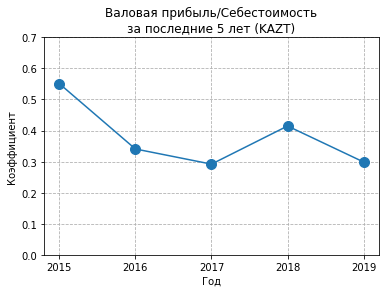

In [88]:
name = "Валовая прибыль/Себестоимость"
plt.plot(dt.index, dt['revenue']/dt['cost_price'] - 1, marker='o', ms=10, label=name)
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.ylim(0, 0.7)
plt.title(f'{name}\nза последние 5 лет ({company})')
plt.xlabel('Год')
plt.ylabel('Коэффициент')
plt.grid(ls='--')
# plt.savefig('../revenue_cost_price.png', dpi=200)

Соотношение валовой прибыли к себестоимости довольно низкое, например у ФосАгро оно не опускалось ниже 0.8, возможно это связано со спецификой бизнеса.

Теперь посмотрю детальнее на выручку

In [18]:
sales_structure = \
pd.Series([29.250, 14.292, 7.075, 6.824], index=['Россия','Азия', 'Европа', 'Прочее'])

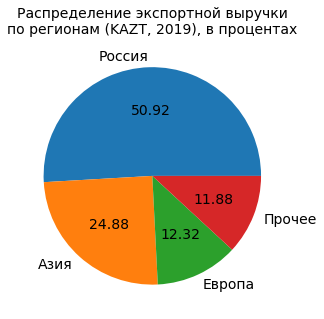

In [90]:
sales_structure.plot(kind='pie', subplots=True, figsize=(7, 5), autopct='%.2f', fontsize=14)
plt.title(f"Распределение экспортной выручки\nпо регионам ({company}, 2019), в процентах", fontsize=14)
plt.ylabel("");
# plt.savefig('../images/revenue_export.png', dpi=200)

На диаграмме видим долю экспорта около 50%, что хорошо, однако по сравнению с 2018 годом экспорт в Азию **упал** на ~4 млрд. руб. (2018: 18.8, 2019: 14.2), а в Европу на ~3 млрд. руб. (2018: 10.8, 2019: 7.1)

In [91]:
sales_structure2 = \
pd.Series([29.997, 20.611, 6.833], 
          index=['Капролактам и\nпродукты переработки','Аммиак и азотные\nудобрения', 'Прочее'])

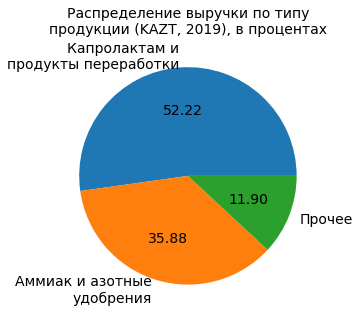

In [92]:
sales_structure2.plot(kind='pie', subplots=False, figsize=(7, 5), autopct='%.2f', fontsize=14)
plt.title(f"Распределение выручки по типу\nпродукции ({company}, 2019), в процентах", fontsize=14)
plt.ylabel("");
# plt.savefig('../images/revenue_kind.png', dpi=200)

Экспорт в Азию осуществляется только капролактама и продуктов его переработки, что кажется не слишком диверсифицированным, а учитывая, что выручка с азиатского рынка сокращается, то это выглядит настораживающе.

> Причиной снижения финансовых показателей стало ухудшения конъюнктуры цен на аммиак, капролактам и продукты его переработки, а также опережающий рост цен на электроэнергию. (*из годового отчёта КуйбышевАзот*)

## Дополнительные факторы

1. *Рыночный риск*
    (Колебания валюты могут повлиять на прибыль: около 45% выручки от реализации компании поступает в иностранной валюте, преимущественно в долларах США, в то время как 92% текущих затрат выражены в рублях.)

1. *Инфляционный риск*
    (Критическими значениями, по мнению Компании, являются значения <инфляции>, которые в 2-3 раз больше прогнозных уровней  Минэкономразвития  РФ)
    
1. *Процентный  риск* 
    (Резкие изменения процентных ставок по кредитам. Рост стоимости кредитов может негативно сказаться на показателях платежеспособности и ликвидности. Основным  источником  заимствований  является  российский кредитный рынок. Большая часть долгового портфеля – кредиты, номинированные в рублях.)

## Дивидендная политика

Компания стремится направлять на дивидендные выплаты не менее 30% чистой прибыли

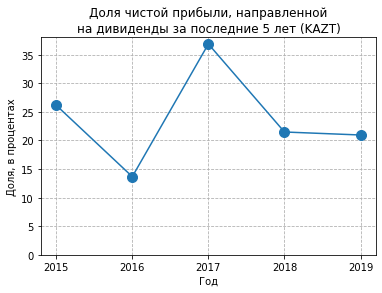

In [94]:
name = "Доля чистой прибыли, направленной\nна дивиденды"
plt.plot( dt.index, 100*dt['dividend']/dt['net_profit'], marker='o', ms=10, label='Дивиденды/акция' )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name} за последние 5 лет ({company})')
plt.ylim(0, None)
plt.xlabel('Год')
plt.ylabel('Доля, в процентах')
plt.grid(ls='--')
# plt.savefig('../images/dividend_net_profit.png', dpi=200)

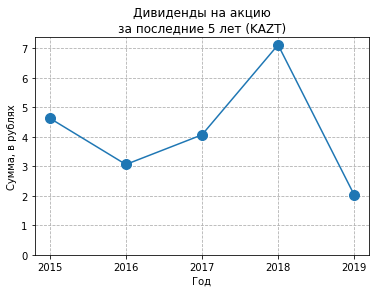

In [95]:
name = "Дивиденды на акцию"
plt.plot( dt.index, dt['dividend']/dt['n_shares'], marker='o', ms=10, label='Дивиденды/акция' )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name}\nза последние 5 лет ({company})')
plt.ylim(0, None)
plt.xlabel('Год')
plt.ylabel('Сумма, в рублях')
plt.grid(ls='--')
# plt.savefig('../images/dividend_share.png', dpi=200)

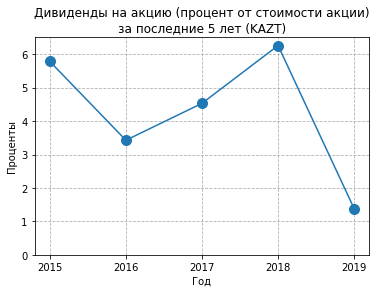

In [96]:
name = "Дивиденды на акцию (процент от стоимости акции)"
plt.plot( dt.index, 100*dt['dividend']/dt['n_shares']/dt['share_price'], marker='o', ms=10, label='' )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name}\nза последние 5 лет ({company})')
plt.ylim(0, None)
plt.xlabel('Год')
plt.ylabel('Проценты')
plt.grid(ls='--')
# plt.savefig('../images/dividend_share_percent.png', dpi=200)

Компания платит дивиденды, что неплохо

## ROA

Отвечает на вопрос, выгоднее ли "владельцу" всё продать и положить деньги на депозит?

In [55]:
assets = dt['assets'].values
mean_assets = (assets[:-1] + assets[1:])/2

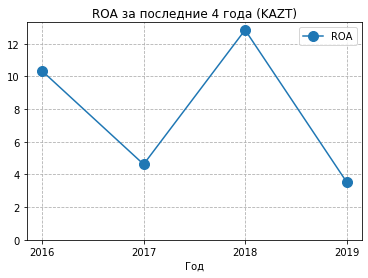

In [98]:
name = "ROA"
plt.plot( dt.index[1:], 100*dt['net_profit'][1:]/mean_assets, marker='o', ms=10, label=name )
plt.xticks(dt.index[1:], dt.index[1:].astype('str'))
plt.legend()
plt.ylim(0, None)
plt.title(f'{name} за последние 4 года ({company})')
plt.xlabel('Год')
plt.grid(ls='--')
# plt.savefig('../images/ROA.png', dpi=200)

Показатель ROA довольно сильно колеблется. Средний по отрасли 5.04 (согласно MSN финансы)

## Оценка компании

Теперь, пользуясь мультипликаторами, можно попробовать проверить, недооценена или переоценена компания на бирже

### Капитализация PHOR

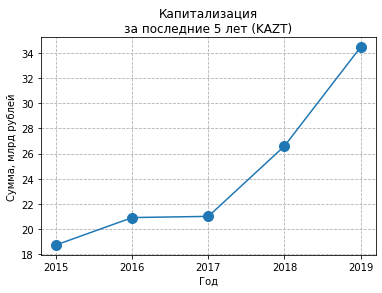

In [99]:
name = "Капитализация"
plt.plot( dt.index, dt['capitalization']*1e-9, marker='o', ms=10, label='Капитализация' )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name}\nза последние 5 лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, млрд рублей')
plt.grid(ls='--')
# plt.savefig('../images/capitalization.png', dpi=200)

Капитализация в 2019 году подскочила, возможно это связано с их успешным отчётом за 2018 год

### P/E
Через сколько лет окупится инвестиция, если прибыль останется на том же уровне и всю прибыль руководство направит на дивиденды

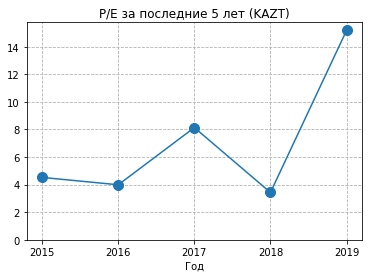

In [100]:
name = "P/E"
plt.plot( dt.index, dt['capitalization']/dt['net_profit'], marker='o', ms=10, label=name )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name} за последние 5 лет ({company})')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--')
# plt.savefig('../images/PE.png', dpi=200)

Возможно в 2018 году компания была существенно недооценённой, но теперь она кажется переоценена

### P/S
Отношение рыночной капитализации компании к её годовой выручке. 
Показатель <1 может говорить о недооценённости компании

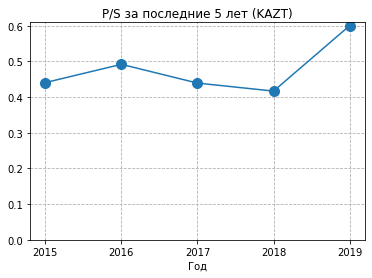

In [102]:
name = "P/S"
plt.plot( dt.index, dt['capitalization']/dt['revenue'], marker='o', ms=10, label=name )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name} за последние 5 лет ({company})')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--')
# plt.savefig('../images/PS.png', dpi=200)

P/S намного ниже среднего по отрасли 1.42 (MSN финансы)

### EV/EBITDA

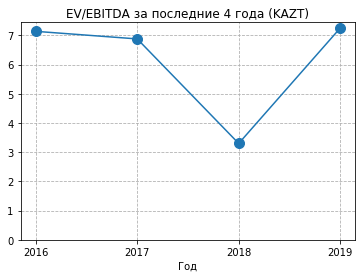

In [103]:
name = 'EV/EBITDA'
years = ['2016', '2017', '2018', '2019']
ev_ebitda = [7.14, 6.88, 3.30, 7.25]
plt.plot(years, ev_ebitda, marker='o', ms=10, label=name )
# plt.legend()
plt.title(f'{name} за последние 4 года ({company})')
plt.xlabel('Год')
# plt.ylabel('') 
plt.ylim(0, None)
plt.grid(ls='--')
# plt.savefig('../images/EV_EBITDA.png', dpi=200)

Довольно большой показатель, особенно по сравнению с 2018 годом

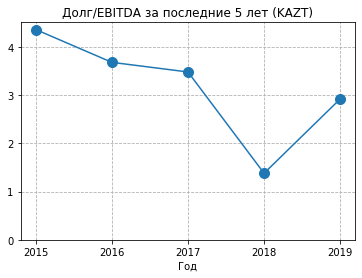

In [104]:
name = 'Долг/EBITDA'
years = ['2015', '2016', '2017', '2018', '2019']
debt_ebitda = [4.36, 3.68, 3.48, 1.38, 2.92]
plt.plot(years, debt_ebitda, marker='o', ms=10, label=name )
# plt.legend()
plt.title(f'{name} за последние 5 лет ({company})')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--')
# plt.savefig('../images/Debt_EBITDA.png', dpi=200)

## [Планы](https://www.kuazot.ru/company/projects/) на будущее

1. Строительство производства сульфат нитрат аммония (запуск должен был быть в **2019**)
1. Очистные сооружения ливневых стоков (2020-2021) - экология
1. Строительство производства карбамида (до 2022)
1. Производство серной кислоты и олеума (2018-2022) - импортозамещение и новая продукция)
1. Увеличение мощности производства капролактама (2017-2023) - их основной продукт
1. Строительство агрегатов слабой азотной кислоты и аммиачной селитры мощностью (первый этап до 2021)

## Вывод

Компания КуйбышевАзот наращивает капитал, запускает новые производства, что довольно интересно.
Реализация планов может увеличить позиции компании.
КуйбышевАзот платит дивиденды, правда не слишком большие.
Возможно на сегодня компания переоценена, но тут нужен дополнительный анализ.